<h1>Анализ оттока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование данных</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Определение-количества-кластеров" data-toc-modified-id="Определение-количества-кластеров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Определение количества кластеров</a></span></li><li><span><a href="#Выделение-кластеров" data-toc-modified-id="Выделение-кластеров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выделение кластеров</a></span></li><li><span><a href="#Характеристики-кластеров" data-toc-modified-id="Характеристики-кластеров-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Характеристики кластеров</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

Для борьбы с оттоком клиентов сеть фитнес-центров  разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. В рамках исследования считается, если клиент за последний месяц ни разу не посетил спортзал, то он попал в отток.

Для разработки стратегии необходимо провести анализ данных из клиентских анкет и подготовить план действий по удержанию клиентов.


## Изучение данных 

In [1]:
# импорт библиотек 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score,silhouette_score
import itertools
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# прочитаем датасеты и сохраним в переменные 
data = pd.read_csv('/Users/aleksandrakiseleva/Desktop/проекты/gym_churn.csv')
# выведем таблицу
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
#размер датасета
print(data.shape)
# получение общей информации о данных датасета
data.info()

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

Согласно документации к данным таблица  содержит:

- 'gender' — пол;

- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

- 'Phone' — наличие контактного телефона;

- 'Age' — возраст;

- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

- 'Group_visits' — факт посещения групповых занятий;

- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

- 'Churn' — факт оттока в текущем месяце.

Размер датасета 14 столбцов: 13 признаков и 1 - целевая переменная "churn".
Количество наблюдений - 4000 записей. Пропусков значений в датасете нет. 

Объем датасета достаточный для построения модели прогнозирования оттока и кластеризации.

Целевая переменная "churn" не имеет временной структуры.

Информация о клиентах представлена 6-ю категориальными признаками в виде бинарных полей , не требующих преобразования, и 7-ю числовыми признаками.

Тип данных столбца Month_to_end_contract необходимо привести к целочисленному типу данных.Типы данных других столбцов соответствующие и корректировки не требуют.

Для удобства работы с данными, а также в качестве общепринятого стандарта  необходимо перевести  наименования столбцов датасета к нижнему регистру.

##  Исследовательский анализ данных

###  Предобработка данных

In [4]:
# приведем названия столбцов к нижнему регистру
data = data.rename(str.lower, axis='columns')

In [5]:
# приведем тип Month_to_end_contract к целочисленному
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
# проверка на дубликаты
data.duplicated().sum()

0

Датасет явных дубликатов не содержит.

In [7]:
# проверка дискретных числовых признаков на значения, не соответствующие действительности 
print(data['age'].unique())
print(data['contract_period'].unique())
print(data['month_to_end_contract'].unique())
print(data['lifetime'].unique())

[29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
[ 6 12  1]
[ 5 12  1  6  3 10 11  9  4  7  8  2]
[ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]


###  Исследование данных

In [8]:
# статистики датасета
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
# числовые характеристики тех кто ушел в отток и тех, кто остался
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


В датасете
 - по гендерному признаку клиенты распределены равномерно, в том числе в разрезе признака "churn"
 - Основная массам клиентов сети живет или работает в районе фитнесс-центра. Среди ушедших клиентов доля тех , кто не относиться к району фитнес-центра выше.
 - 49% клиентов выборки являются сотрудниками компаний-партнеров сети.Такие клиенты реже попадают в отток
 - Доля клиентов, пришедших по рекомендации составляет 31%, аналогично сотрудниками компаний-партнеров клиенты данной группы реже перестают посещать центр.
 - У 90% клиентов в выборки указан номер телефона в анкете
 - Средняя длительность абонементов клиентов - 4,7мес. Клиенты с коротким сроком договора чаще оказываются в оттоке.
 - 41% клиентов ходит на групповые занятия.Клиенты,не ушедшие в отток, чаще посещают групповые занятия.
 - Средний возраст клиента фитнес-центра 29 лет, стандартное отклонение по возрасту равняется 3,3, а максимальный возраст клиентов - 41 год. В группах по признаку оттока есть различие в среднем возрасте клиентов . Клиенты, попадающие в отток , немного моложе,остающихся клиентов.
 - Средние расходы клиентов на доп. услуги равны 147 единицам, разброс трат клиентов значительный , стандартное отклонение равно 96 единицам.Что значит, что есть клиенты , которые практически не пользуются доп.услугами фитнесс-центров, а есть те , которые данными услугами пользуются часто.В группе клиентов , не ушедших в отток, средние траты клиентов на доп.услуги выше , чем у клиентов , попавших в отток.
 - Большая часть клиентов выборки начали посещать куб недавно, среднее время с момента первого посещения равно 3,7 мес.Данных признак сильно различается в группах клиентов , попавших и не попавших в отток. Клиенты, ушедшие в отток, значительно более короткое время посещали фитнесс-клуб.В среднем , таким клиентам требуется месяц на принятие решение о дальнейшем посещении клуба.
 - Клиента, ушедшие в отток, реже посещали клуб, среднее количество посещений в неделю в месяце перед оттоком  для них равна 1.04, в то время как оставшиеся клиенты ходили в среднем 2 раза в неделю.

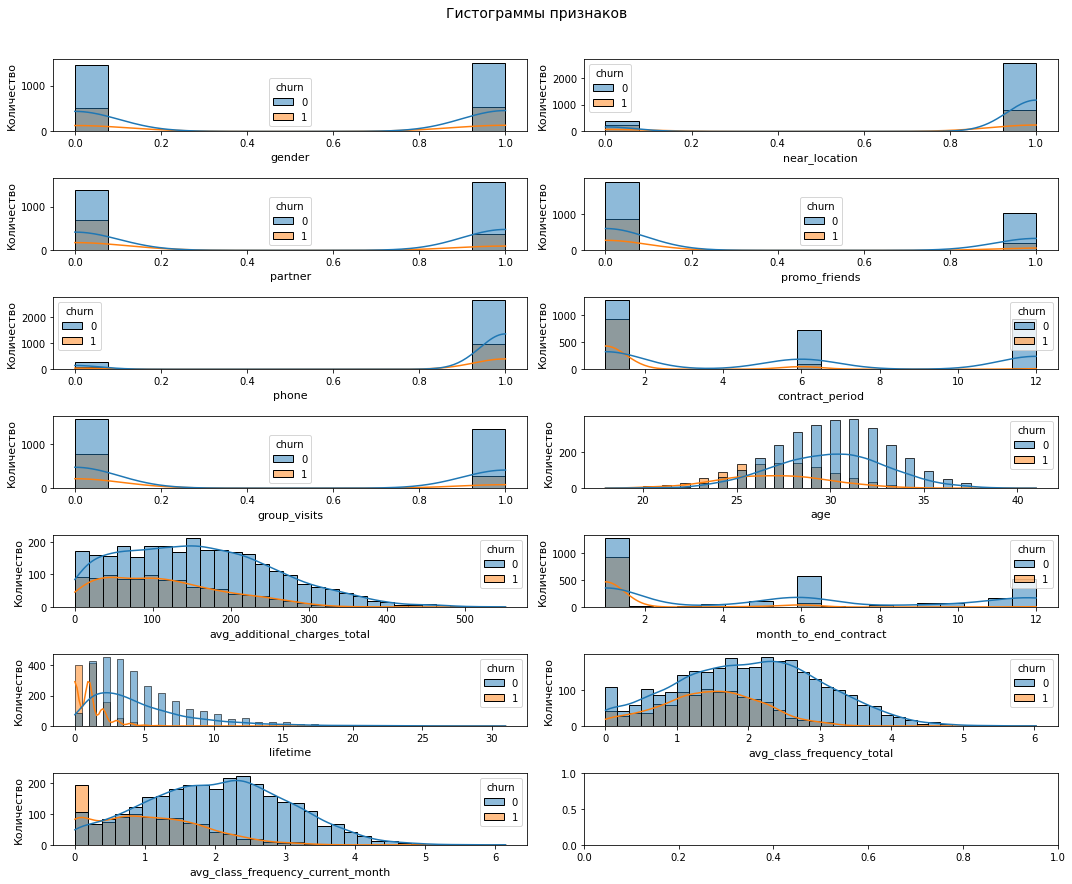

In [10]:
#построим гистгораммы признаков
fig, axs = plt.subplots(7, 2, figsize=(15, 12))
fig.suptitle('Гистограммы признаков', size=14, y=1.02)


features = data.drop(columns='churn').columns.to_list()

for feature, ax in zip(features, np.ravel(axs)):
    sns.histplot(data = data, x=feature, hue='churn', ax=ax, kde=True)
    ax.set_ylabel('Количество', fontsize = 11)
    ax.set_xlabel(feature, fontsize = 11)
    
    
plt.tight_layout()

Клиенты, которые :
 - живут или работают не в райне фитнес-клуба,
 - не являются работниками компаний-партнеров ,
 - не пришли по рекомендации друзей ,
 - имеют короткий срок абонемента,
 - не посещают групповые занятий,
 - редко посещают фитнес-центр

с большей долей вероятности уйдут в отток.

Проверим данные на шумы.

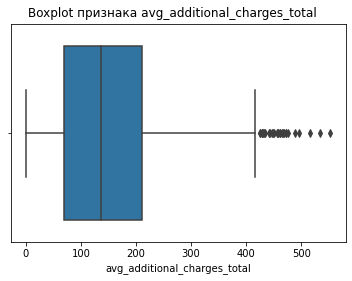

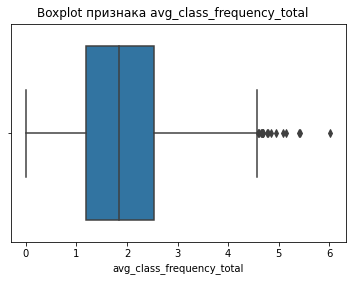

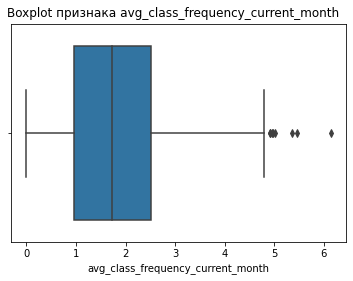

In [11]:
# визуализация распределения чиловых признаков
data_boxplot = data[['avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month']]
for col in data_boxplot.columns:
    sns.boxplot(data[col])
    plt.suptitle('Boxplot признака {}'.format(col), y=0.94, fontsize=12)# fontweight='bold')
    plt.show()

В выборке есть клиенты, которые аномально много тратят на доп.услуги фитнес-центра, а также те , которые аномально часто посещают фитнес-центр.

Исследуем линейную зависимость между признаками и целевой переменной.

<AxesSubplot:>

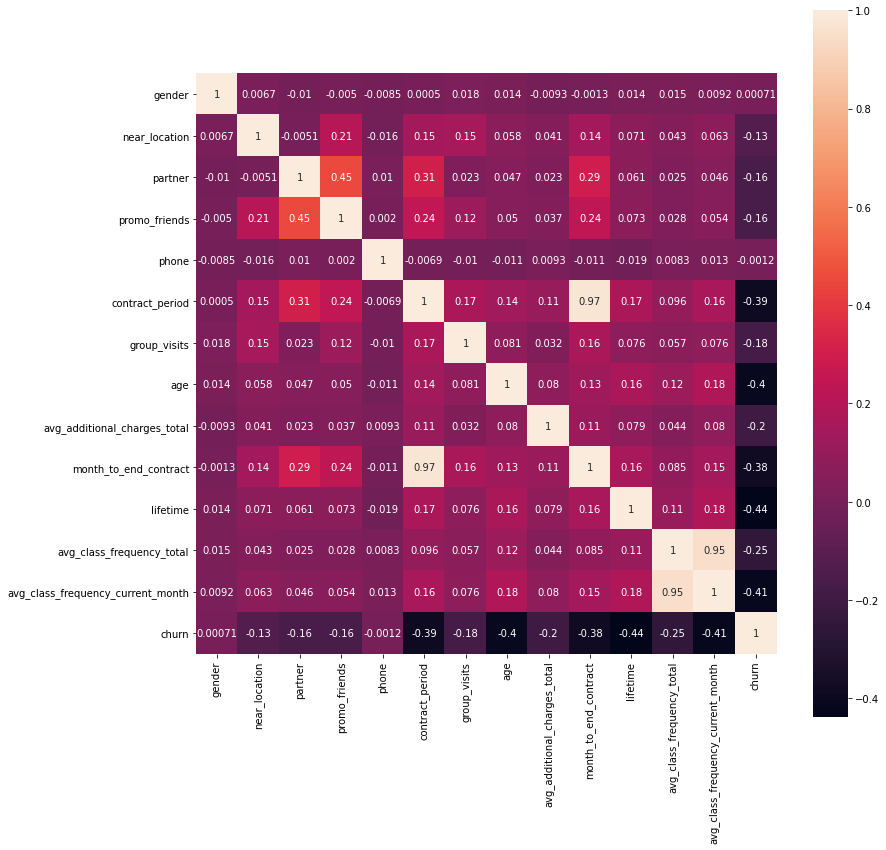

In [12]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True,square=True)

Явной сильной зависимости оттока от признаков не выявлено.

Есть признаки , имеющие отрицательную корреляцию средней тесноты с фактом оттока:
 - срок абонемента,
 - возраст
 - срок до окончания абонемента,
 - срок жизни клиента
 - частота поещения в неделю в предыдущем месяце.
 
Чем сильнее признак , тем ниже вероятность оттока. 

В выборке есть мультиколлинеарные признаки:
 - срок абонемента и срок до окончания абонемента,
 - средняя частота посещений в неделю за предыдущий месяц и средняя частота посещений в неделю за все время с начала действия абонемента;


Сформируем отдельный датасет без мультиколлинеарных признаков. В дальнейшем обучать модель будем по 2 датасетам (с такими признаками и без мультиколлинеарности), чтобы выбрать лучшую по метрикам:

     - из Contract_period и Month_to_end_contract (корреляция между признаками 0,97) оставим первый, так как он имеет немного более тесную связь с целевой переменной
     
     - из Avg_class_frequency_total и Avg_class_frequency_current_month оставим 2-ой по той же причине 
     

In [13]:
#удалим мультиколлинеарные столбцы
data_drop_multicol = data.drop(['month_to_end_contract','avg_class_frequency_total'],axis=1)
data_drop_multicol.shape

(4000, 12)

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Модель на train-выборке обучим двумя способами:
 - логистической регрессией,
 - случайным лесом.

Так как данные не имеют временной структуры для деления выборки на обучающую и валидационную будем использовать метод случайного разбиения.


Построим модель, обученную логистической регрессией, по  датасету без удаления мультиколлинеарных признаков.

In [14]:

# разделим  данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn',axis=1)
y = data['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train,y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

# создадим и обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для нашей модели
lr_model = LogisticRegression(solver='liblinear',random_state=0)
# обучим модель
lr_model.fit(X_train_st,y_train)
# сделаем прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]


Построим модель, обученную логистической регрессией, по  датасету ,где удалена мультиколлинеарность.

In [15]:
# разделим  данные на признаки (матрица X) и целевую переменную (y)
X_m = data_drop_multicol.drop('churn',axis=1)
y_m = data_drop_multicol['churn']

# разделим модель на обучающую и валидационную выборку
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m,y_m, test_size=0.2, random_state=0)

# создадим и обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train_m)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st_m = scaler.transform(X_train_m)
X_test_st_m = scaler.transform(X_test_m)

# зададим алгоритм для нашей модели
lr_model_m = LogisticRegression(solver='liblinear',random_state=0)
# обучим модель
lr_model_m.fit(X_train_st_m,y_train_m)
# сделаем прогнозы
lr_predictions_m = lr_model_m.predict(X_test_st_m)
lr_probabilities_m = lr_model_m.predict_proba(X_test_st_m)[:,1]

Построим модель, обученную случайным лесом, по  датасету без удаления мультиколлинеарных признаков.

In [16]:
# зададим алгоритм  на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

Построим модель, обученную случайным лесом, по  датасету, где  удалена мультиколлинеарность.

In [17]:
# зададим алгоритм  на основе алгоритма случайного леса
rf_model_m = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model_m.fit(X_train_st_m, y_train_m)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_m = rf_model_m.predict(X_test_st_m)
rf_probabilities_m = rf_model_m.predict_proba(X_test_st_m)[:, 1]

In [18]:
# напишем функцию, которая будет выводить метрики

def print_all_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tДоля правильных ответов -Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tТочность - Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tПолнота - Recall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1-мера: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tПлощадь под кривой ошибок - roc_auc_score: {:.2f}'.format(roc_auc_score(y_true, y_pred)))
    

In [19]:
# выведем метрики 
print_all_metrics(y_test, lr_predictions, lr_probabilities, 'логистическая регрессия для изначального датасета')
print_all_metrics(y_test_m, lr_predictions_m, lr_probabilities_m, 'логистическая регрессия для  датасета без мультиколлинеарных признаков')
print_all_metrics(y_test, rf_predictions, rf_probabilities, 'случайный лес для изначального датасета')
print_all_metrics(y_test_m, rf_predictions_m, rf_probabilities_m, 'случайный лес для  датасета без мультиколлинеарных признаков')
    

логистическая регрессия для изначального датасета
	Доля правильных ответов -Accuracy: 0.92
	Точность - Precision: 0.85
	Полнота - Recall: 0.83
	F1-мера: 0.84
	Площадь под кривой ошибок - roc_auc_score: 0.89
логистическая регрессия для  датасета без мультиколлинеарных признаков
	Доля правильных ответов -Accuracy: 0.90
	Точность - Precision: 0.79
	Полнота - Recall: 0.82
	F1-мера: 0.81
	Площадь под кривой ошибок - roc_auc_score: 0.88
случайный лес для изначального датасета
	Доля правильных ответов -Accuracy: 0.92
	Точность - Precision: 0.84
	Полнота - Recall: 0.81
	F1-мера: 0.83
	Площадь под кривой ошибок - roc_auc_score: 0.88
случайный лес для  датасета без мультиколлинеарных признаков
	Доля правильных ответов -Accuracy: 0.90
	Точность - Precision: 0.81
	Полнота - Recall: 0.75
	F1-мера: 0.78
	Площадь под кривой ошибок - roc_auc_score: 0.85


Лучшие метрики показала модель по датасету без удаления мультиколлинеарных признаков и обученная логистической регрессией.
Данная модель точнее будет предсказывать отток клиентов.

## Кластеризация клиентов

### Определение количества кластеров

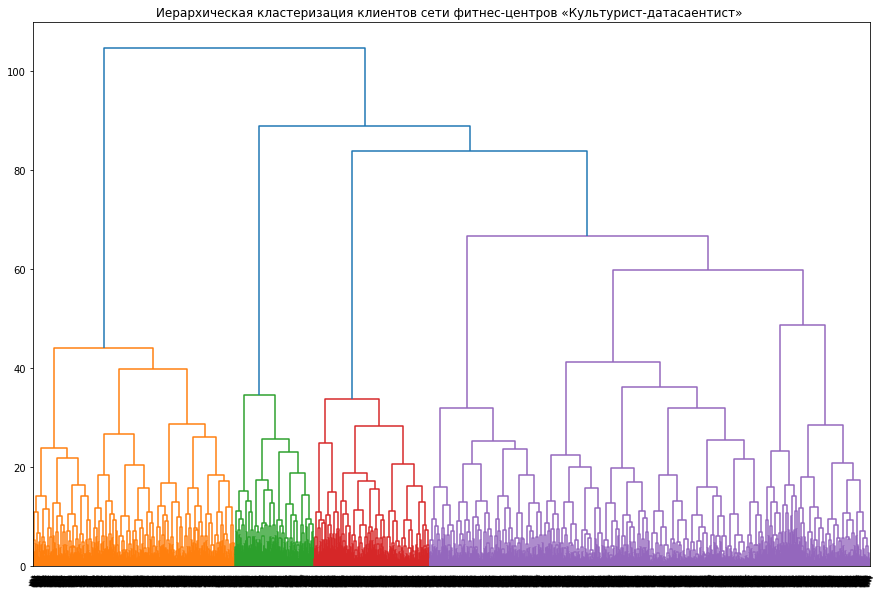

In [20]:

# разделим  данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn',axis=1)


# создадим  StandartScaler 
scaler = StandardScaler()


# Преобразуем набор данных
X_st = scaler.fit_transform(X)

#Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму
linked = linkage(X_st, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов сети фитнес-центров «Культурист-датасаентист» ')
plt.xticks(rotation=70)
plt.show()

На дендограмме видно 4-ро кластеров. 

### Выделение кластеров 

In [21]:

# задаём модель k_means с числом кластеров 5 (установлено условиями задачи)
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_st, labels)))
# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

Silhouette_score: 0.14


### Характеристики кластеров

In [22]:

# выводим статистику по средним значениям наших признаков по кластеру
data_group = data.groupby('cluster_km').agg('mean')
#создадим новый столбец avg_additional_charges_month, посмотрим сколько клиент приносит денег от сопутсвующих товаров и услуг на 1 месяц пользования договром
data_group['avg_additional_charges_month'] = data_group['avg_additional_charges_total']/data_group['lifetime']
data_group.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,avg_additional_charges_month
cluster_km,,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723,33.939930
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532,36.680146
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564,48.207215
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263,53.930916
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019,33.001053


Наибольшая вероятность оттока у клиентов кластера 3, наименьшая - у клиентов кластера 0.

Все клиенты наименее надежного кластера 3 живут или работают в районе фитнес-центра.

Наиболее высокая доля клиентов, являющихся сотрудниками компаний-партнеров, у 0 кластера - наиболее надежного. Также в этом классе большего всего клиентов пришедших по рекомендации друзей. Клиенты этого кластера имеют наибольший среди всех остальных кластеров средний срок абонемента, чаще остальных посещают групповые занятия.

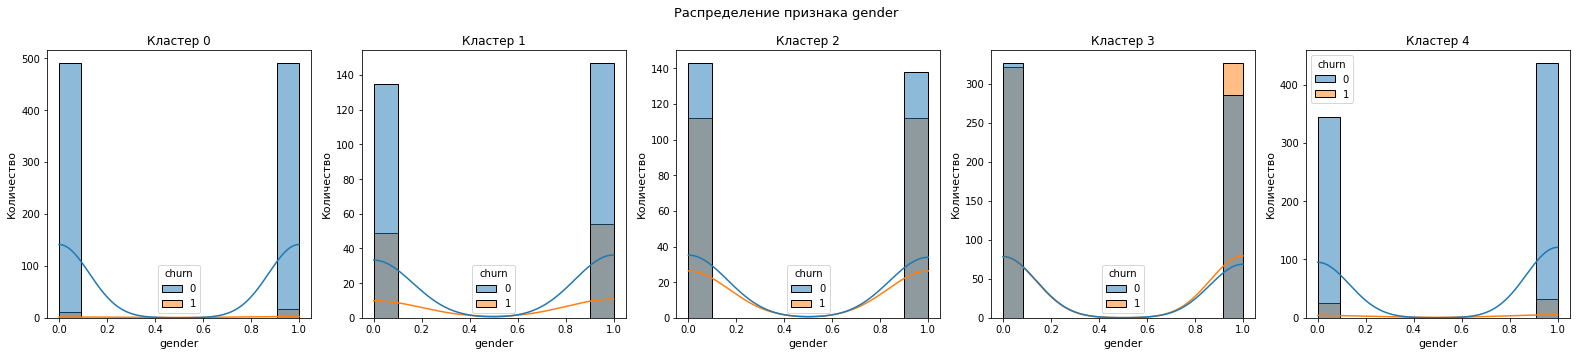

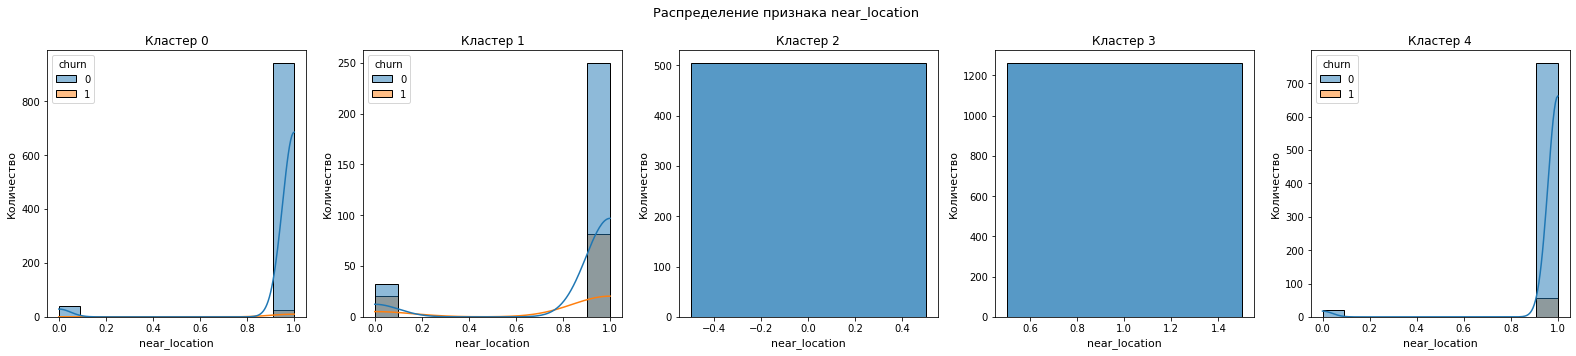

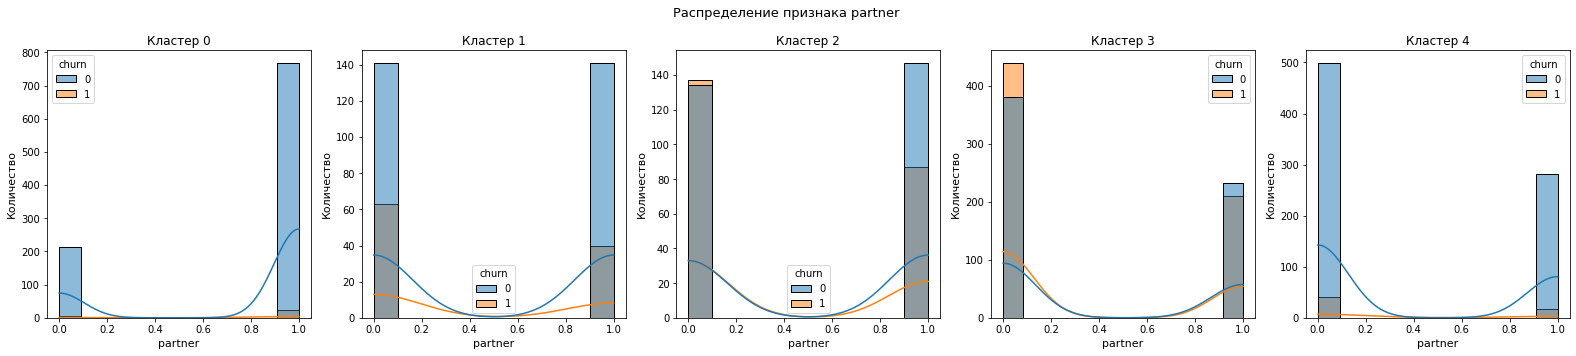

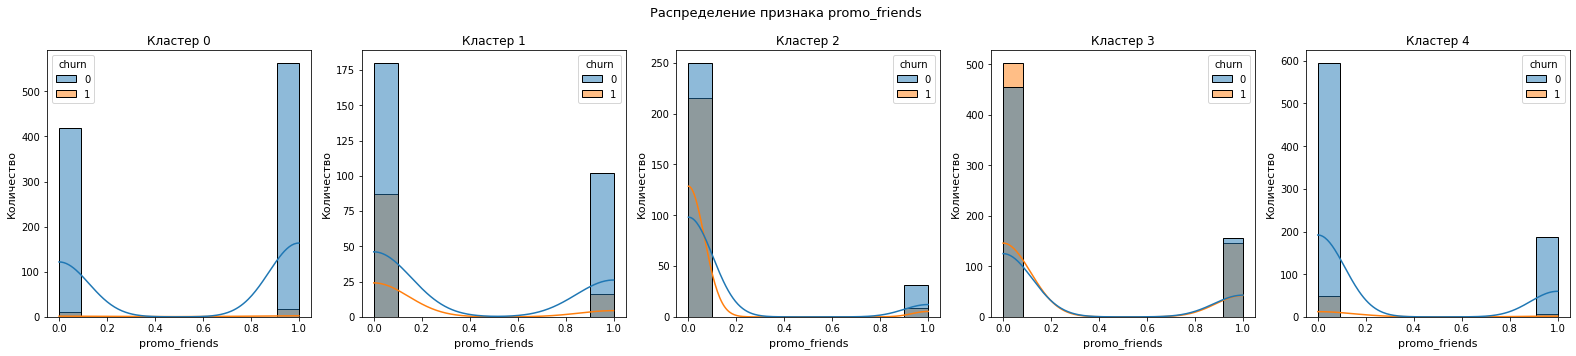

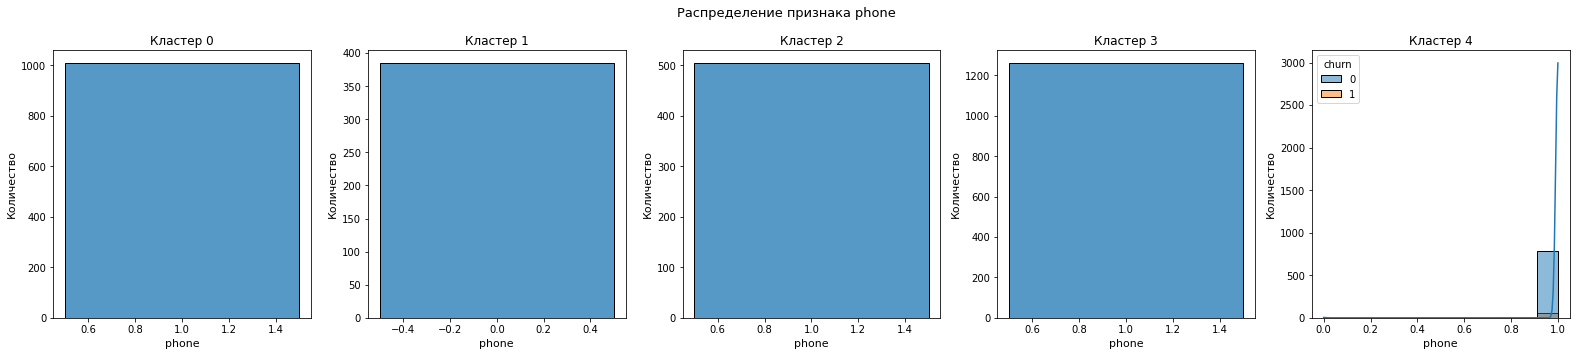

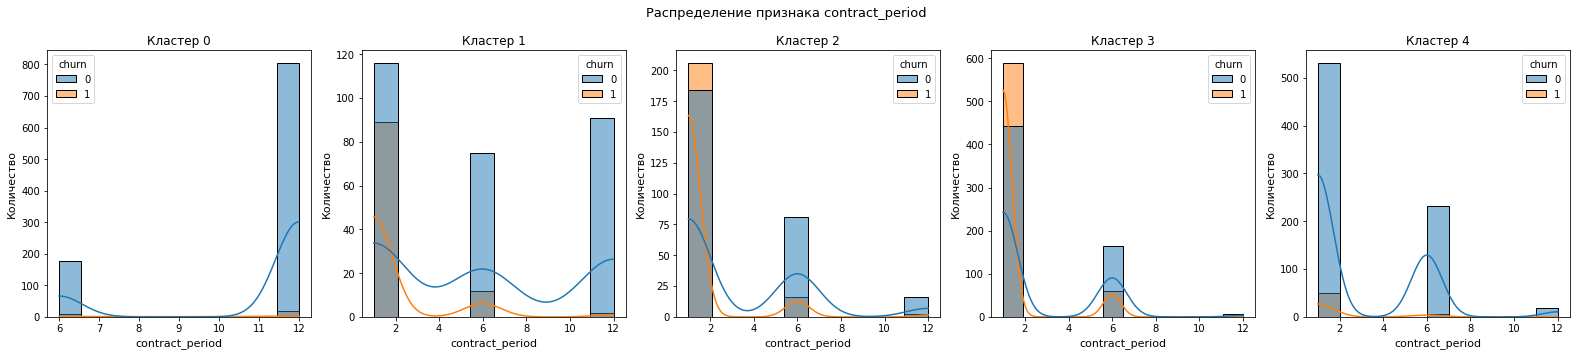

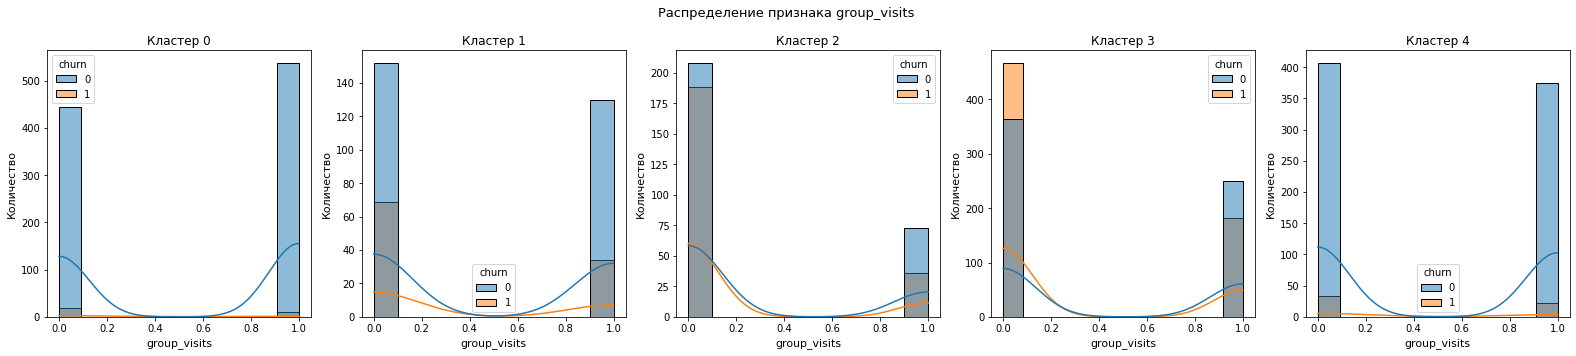

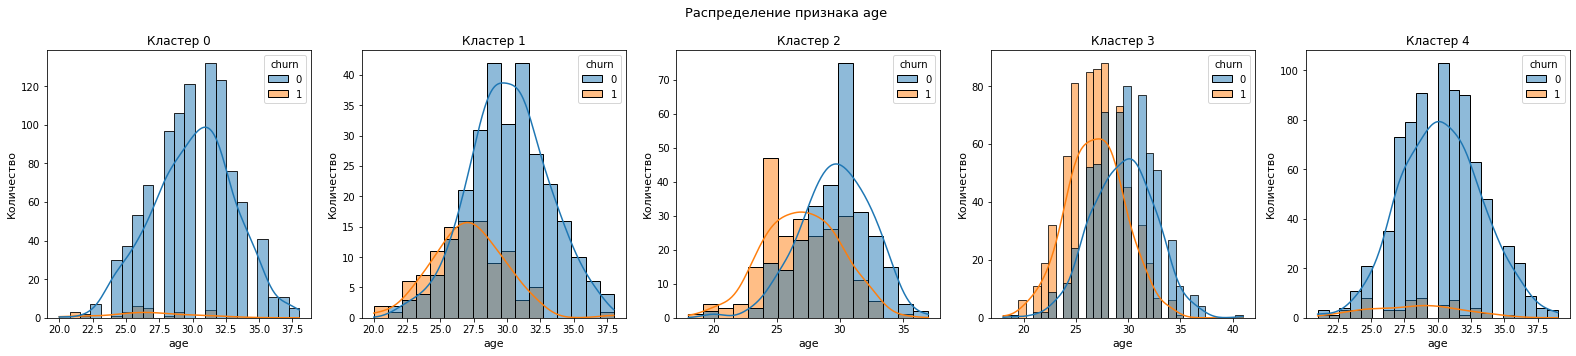

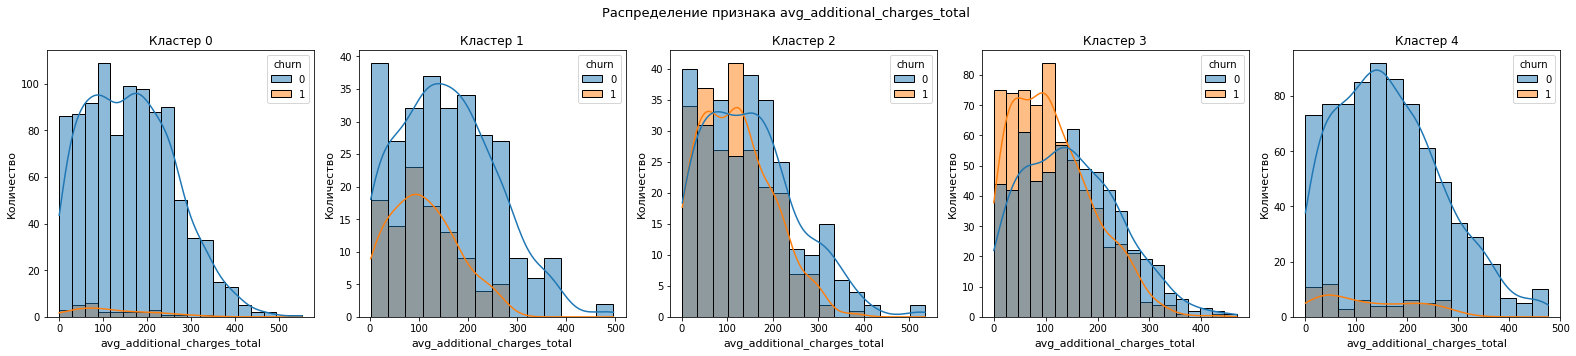

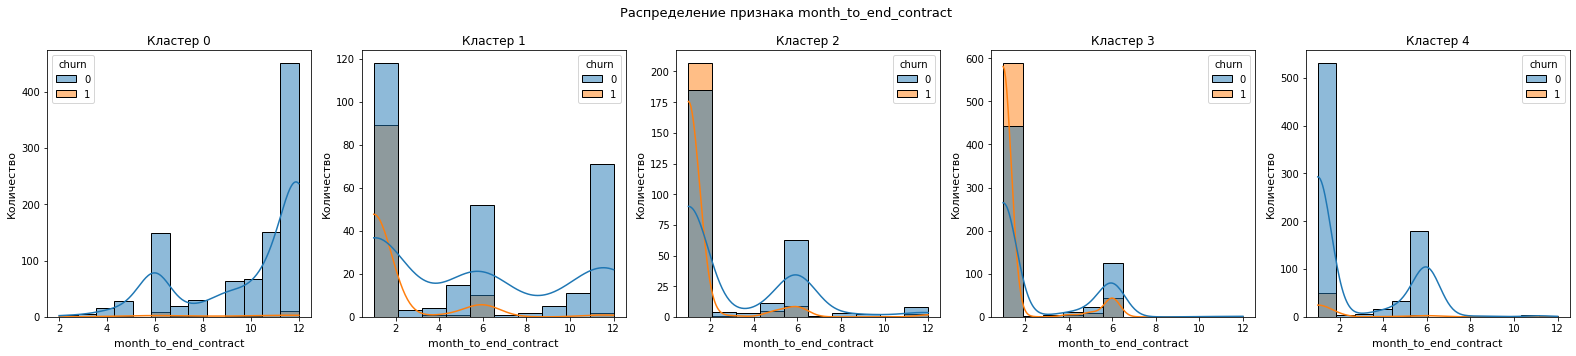

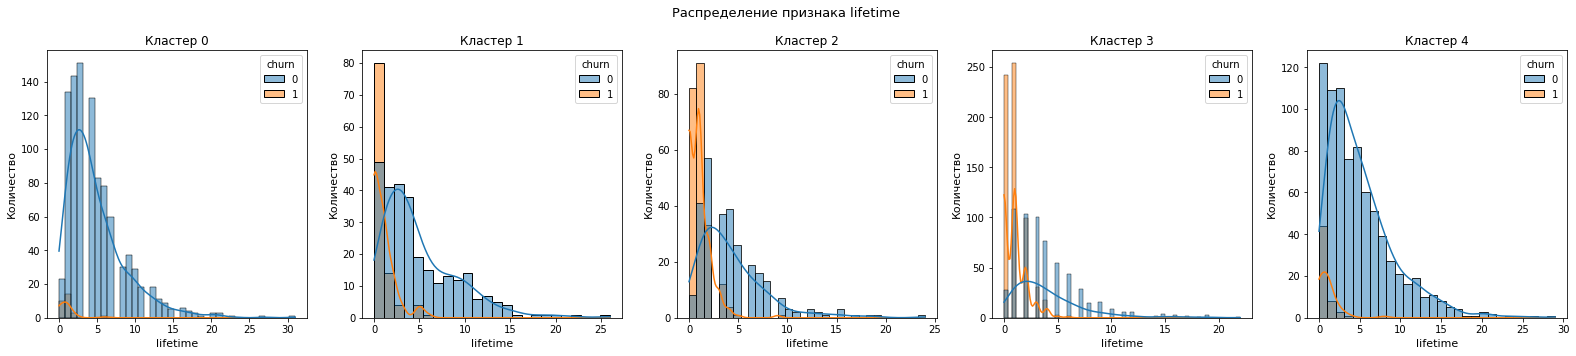

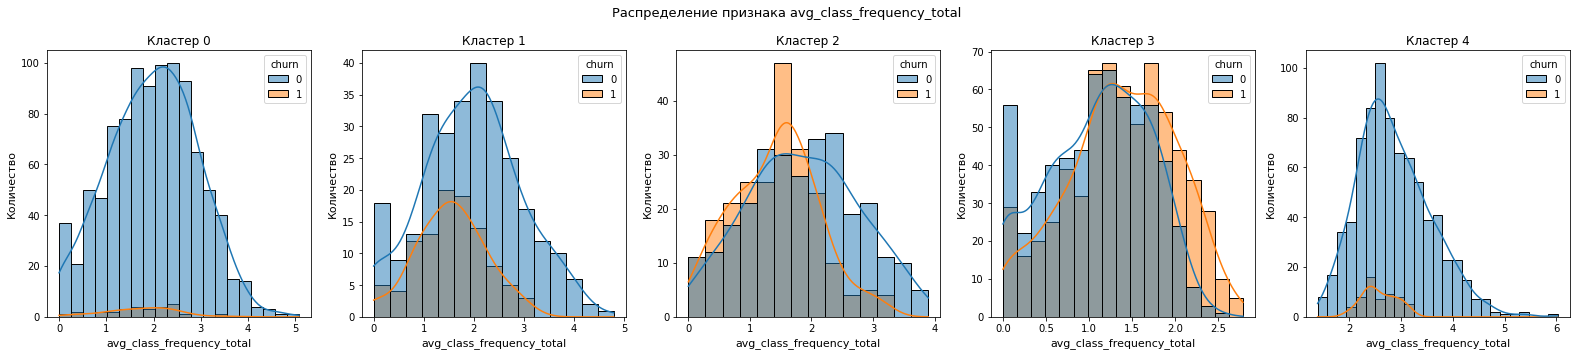

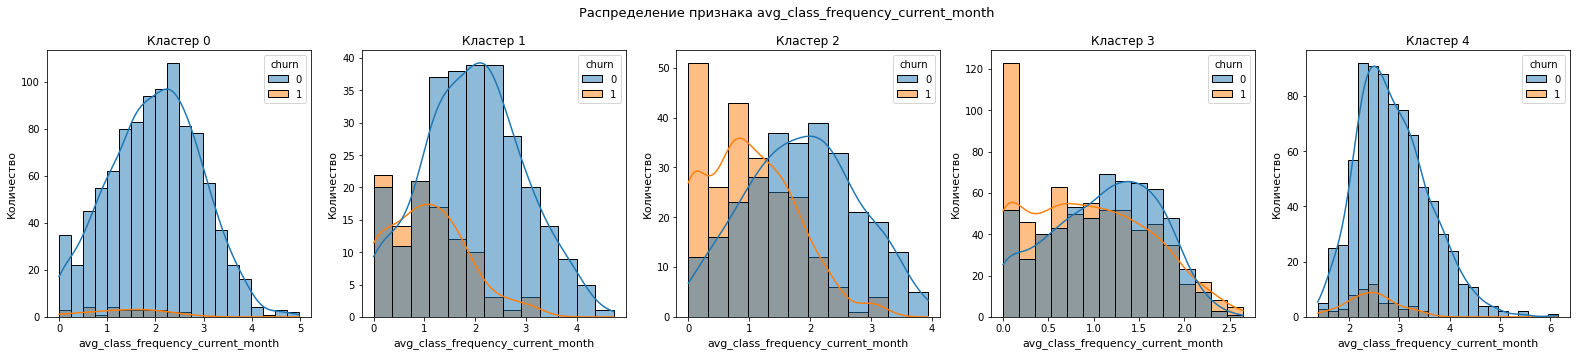

<Figure size 432x288 with 0 Axes>

In [23]:

# визуализируем распределение признаков для кластеров    
for feature in features:
    fig, axs = plt.subplots(1, 5, figsize=(22, 5))
    plt.suptitle('Распределение признака {} '.format(feature), fontsize = 13)
    for value,ax in zip(np.sort(data['cluster_km'].unique()),np.ravel(axs)):
        try:
            sns.histplot(data = data.query('cluster_km==@value').drop('cluster_km',axis=1), x=feature, hue='churn', ax=ax, kde=True)
            ax.set_xlabel(feature, fontsize = 11)
            ax.set_ylabel('Количество', fontsize = 11)
            ax.set_title('Кластер {}'.format(value))
            plt.tight_layout()
        except:
            
            sns.histplot(data = data.query('cluster_km==@value').drop('cluster_km',axis=1), x=feature,ax=ax,discrete=True)
            ax.set_xlabel(feature, fontsize = 11)
            ax.set_ylabel('Количество', fontsize = 11)
            ax.set_title('Кластер {}'.format(value))
            plt.tight_layout()
    plt.show()        
   
    
plt.tight_layout()



In [24]:
#доля оттока
ratio_churn = data.groupby('cluster_km')['churn'].mean().to_frame().sort_values(by='churn',ascending=False)*100
ratio_churn['ratio_group'] = data.groupby('cluster_km')['churn'].count()/data['cluster_km'].count()*100
ratio_churn

,churn,ratio_group
cluster_km,,
3,51.426307,31.550
2,44.356436,12.625
1,26.753247,9.625
4,6.801909,20.950
0,2.772277,25.250


Гендерное разделение одинаково для всех кластеров.

Клиенты кластера 0:
 - реже всех других кластеров уходят в отток, доля оттока кластера - 3%
 - в основном, живут или работают в районе финес-центра,
 - в основной массе являются сотрудниками фирм-партнеров,
 - заключают абонементы на длительные сроки, в кластере отсутствуют клиенты с абонементами на 1 мес.
 - чаще остальных ходят на групповые занятия
 - средня частота посещения клуба в неделю может доходить до 5 раз
 - средние ежемесячные траты на доп.услуги самые низкие среди кластеров
 
Клиенты кластера 1:
 -  основном, живут или работают в рвйоне фитнес-центра,
 - основная часть клиентов приняло решение о покупке абонемента самостоятельно (69% не имели промокода друга и 53% не являются сотрудниками компаний партнеров )
 - большая часть клиентов кластера имеют абонемент сроком на 1 мес,
 - посещают фитнес-центр, в том числе ходят  на групповые занятия немногим реже самых надежных клиентов кластера 0
 
Клиенты кластера 2:
 - основная часть клиентов принимало решение о выборе клуба самостоятельно(только 8%  кластера пришли по рекомендации друзей)
 - реже всех других клиентов ходят на групповые занятия
 - основная  часть клиентов имеет абонементы сроком на 1 мес.
 - высокая доля оттока - 44 %
 
Клиенты кластера 3:
 - имеют самую высокую долю оттока , каждый второй клиент перестает посещать фитнес-центр,
 - доля кластера среди всех клиентов выборки самая высокая  - 32%,
 - более 70% кластера имеют абонемент на 1 мес., у клиентов кластера отсутствуют абонементы сроком на 12 мес,
 - средняя частота посещения в неделю не превышает 3 раз, самый низкий показатель среди кластеров,
 - средние траты на доп.услуги в месяц самые высокие среди кластеров. 
 - большая часть клиентов кластера имеет возраст от 25 до 30 лет со смещением к 25 годам, в то время когда распределение возраста клиентов остальных кластеров тяготеет к 30 годам. 

Клиенты кластера 4:
 - имеют низкую долю оттока - 7%,
 - часто посещают фитнес-центр, средняя часто посещения в неделю может доходить до 6 раз,
 - более половины кластера имеют абонемент на 1 мес,
 - меньше всех остальных тратят на доп. услуги в месяц


## Общий вывод

Цель проводимого исследования - анализ признаков клиентов и подготовление плана действий по удержанию клиентов .

В ходе исследования была проведена предобработка данных,исследовательский анализ данных,была построена модель прогнозирования оттока клиентов и проведена их кластеризация.


В ходе анализа было установлено, что :
   
 1. оптимальным алгоритмом для прогнозирования оттока клиентов является логистическая регрессия 

Данная модель показала наилучшие метрики качества.
 
 
 2. Факт оттока имеет линейную связь со сроком абонемента, возрастом клиента и частотой посещения фитнес-центра.
 
 Чем ниже данные показатели - тем выше вероятность оттока.
 
 
 3. Выделено 5 отсновных групп клиентов с разной степенью оттока
 
 46% клиентов выборки имеют низкую долю оттока : от 3 до 7%
 
 
 4. Клиенты , наиболее склонные к оттоку (32% выборки) имеют свои характерные черты.
 
 Такие клиенты моложе остальных категорий (основная часть от 25 до 30 лет), покупают абонементы на 1 мес, в среднем посещают фитнес-центр до 3 раз в неделю.
 
 
 5. Наиболее надежные клиенты - это сотрудники фирм-партнеров или клиенты, пришедшие по рекомендации друзей. Покупают абонемент на длительный срок. Часто ходят в фитнес-центр (в среднем до 6 раз в неделю) и чаще остальных выбирают групповые занятия
 
 
 6. Наибольшее количество допольнительных доходов в месяц приносят клиенты наиболее склонные к  оттоку(кластер 3). Меньше всего в месяц тратят самые надежные клиенты кластеров 0 и 4. 

Основные рекомендации по повышению качества работы с клиентами:
 1. Стимулировать надежных клиентов на повышение ежемесячных трат на дополнительные услуги.
 Например,предоставлять скидки на доп.услуги в зависимости от длительности абонемента. Ввести накопительную бонусную программу.  
 
 
 2. Настройка системы реагирования на тригерные события: снижение частоты посещения клуба, достижение низкого срока до окончания абонемента и др. 

3. Стимулировать склонных к оттоку клиентов к продлению абонементов на более длительный срок с помощью спецпредложений.
Увеличивать среднюю посещаемость данной категории  дополнительными встречами с тренерами ,диетологами внутри клуба и вовлечением таких клиентов в фитнес-сообщетсво клуба.